In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

import os
import tensorflow as tf
import keras
import cv2
import random

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers , models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
Emotion_Classes = ['happy', 'sad']

In [ ]:
# Load the saved model
model = load_model('/kaggle/input/my-data/Emotion_Analyzer.h5')

In [31]:
Music_Player = pd.read_csv("/kaggle/input/my-data/data_moods.csv")

# Assuming Music_Player is a DataFrame with 'mood' and 'popularity' columns
def Recommend_Songs(pred_class):
    num_songs = 5

    # Check if the predicted class is 'happy' or 'sad'
    if pred_class in ['happy', 'sad']:
        # Filter by the corresponding mood, ignoring the 'Sad' category in the dataset
        if pred_class == 'sad':
            mood_filter = ['Calm', 'Energetic']  # Change this list as per your requirement
        else:
            mood_filter = ['Happy']

        Play = Music_Player[Music_Player['mood'].isin(mood_filter)]
        Play = Play.sort_values(by="popularity", ascending=False)

        # Ensure there are enough songs to recommend
        if len(Play) < num_songs:
            print("Not enough songs to recommend.")
            return

        # Randomly select songs, considering popularity
        top_songs = Play.head(int(len(Play) * 0.2))  # Top 20% popular songs
        other_songs = Play.iloc[int(len(Play) * 0.2):]  # Remaining 80% songs

        recommendations = top_songs.sample(min(num_songs, len(top_songs)), replace=False)
        if len(recommendations) < num_songs:
            recommendations = recommendations.append(other_songs.sample(num_songs - len(recommendations), replace=False))
        
        recommendations = recommendations.reset_index(drop=True)
        recommendations = recommendations.iloc[:, 0:3]
        display(recommendations)
    else:
        print("Invalid mood class. No recommendations available.")

In [16]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
    
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")  

--2023-12-03 08:34:17--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2023-12-03 08:34:17 (26.2 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [19]:
def load_and_prep_image(filename, img_shape = 224):

    img = cv2.imread(filename)

    GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)
    
    for x,y,w,h in faces:
        
        roi_GrayImg = GrayImg[ y: y + h , x: x + w ]
        roi_Img = img[ y: y + h , x: x + w ]
        
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        
        faces = faceCascade.detectMultiScale(roi_Img, 1.1, 4)
        
        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ ey: ey+eh , ex: ex+ew ]
    
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    RGBImg= cv2.resize(RGBImg,(img_shape,img_shape))

    RGBImg = RGBImg/255.

    return RGBImg

In [20]:
def pred_and_plot(filename, class_names):

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[pred.argmax()]
    print(pred_class)

    # Plot the image and predicted class
    #plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);
    
    Recommend_Songs(pred_class)

In [46]:
# Downloading Image to Test On
!wget -c "https://img.freepik.com/free-photo/troubled-displeased-bearded-man-frowns-face-feels-sad-distressed-upset-being-bored-sitting-quarantine-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg" -O Final_Image_sad.jpg

--2023-12-03 08:51:36--  https://img.freepik.com/free-photo/troubled-displeased-bearded-man-frowns-face-feels-sad-distressed-upset-being-bored-sitting-quarantine-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg
Resolving img.freepik.com (img.freepik.com)... 23.216.147.137, 23.216.147.158, 2600:1409:12::6850:5952, ...
Connecting to img.freepik.com (img.freepik.com)|23.216.147.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28716 (28K) [image/jpeg]
Saving to: ‘Final_Image_sad.jpg’

Final_Image_sad.jpg 100%[===================>]  28.04K   125KB/s    in 0.2s    

2023-12-03 08:51:37 (125 KB/s) - ‘Final_Image_sad.jpg’ saved [28716/28716]



1/1 [==============================] - 0s 166ms/step


,name,album,artist
0,Cold as Stone (feat. Charlotte Lawrence) - Lip...,Cold as Stone (Remixes) (feat. Charlotte Lawre...,Kaskade
1,Hash Pipe,Weezer (Green Album),Weezer
2,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath
3,Duality,Vol. 3: The Subliminal Verses,Slipknot
4,A Place for My Head,Hybrid Theory (Bonus Edition),Linkin Park


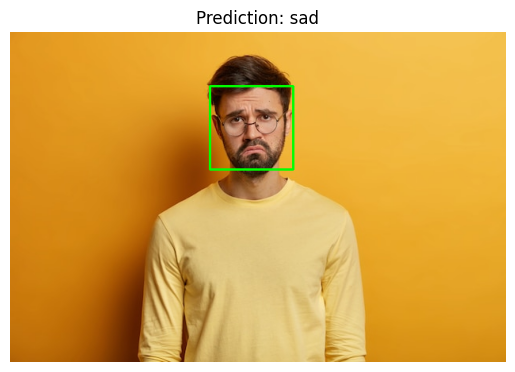

In [47]:
pred_and_plot("/kaggle/working/Final_Image_sad.jpg", Emotion_Classes)

In [50]:

!wget -c "https://img.freepik.com/free-photo/lifestyle-summer-people-emotions-concept-close-up-portrait-miserable-distressed-young-man-looking-gloomy-sad-feeling-heartbroken-tired-frowning-yellow-background_1258-60011.jpg" -O Final_Image_sad_2.jpg

--2023-12-03 08:56:35--  https://img.freepik.com/free-photo/lifestyle-summer-people-emotions-concept-close-up-portrait-miserable-distressed-young-man-looking-gloomy-sad-feeling-heartbroken-tired-frowning-yellow-background_1258-60011.jpg
Resolving img.freepik.com (img.freepik.com)... 104.86.182.10, 2600:1409:12::6850:5952, 2600:1409:12::1736:1250
Connecting to img.freepik.com (img.freepik.com)|104.86.182.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24367 (24K) [image/jpeg]
Saving to: ‘Final_Image_sad_2.jpg’

Final_Image_sad_2.j 100%[===================>]  23.80K  --.-KB/s    in 0.1s    

2023-12-03 08:56:36 (229 KB/s) - ‘Final_Image_sad_2.jpg’ saved [24367/24367]



1/1 [==============================] - 0s 166ms/step


,name,album,artist
0,Savior,Appeal To Reason,Rise Against
1,The Wall,The Wall,Alok
2,Midnight Sun,Midnight Sun,Nicky Romero
3,The Hardest Button To Button,Elephant,The White Stripes
4,Waiting For Tomorrow (feat. Mike Shinoda),BYLAW EP,Martin Garrix


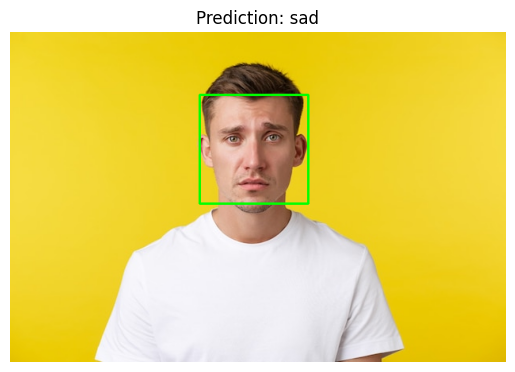

In [51]:
pred_and_plot("/kaggle/working/Final_Image_sad_2.jpg", Emotion_Classes)

In [48]:
# Downloading Image to Test On
!wget -c "https://img.freepik.com/premium-photo/happy-man-with-clear-innocent-smile-face_39688-3142.jpg" -O Final_Image_Happy.jpg

--2023-12-03 08:52:24--  https://img.freepik.com/premium-photo/happy-man-with-clear-innocent-smile-face_39688-3142.jpg
Resolving img.freepik.com (img.freepik.com)... 23.216.147.158, 23.216.147.165, 2600:1409:12::6850:5952, ...
Connecting to img.freepik.com (img.freepik.com)|23.216.147.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26119 (26K) [image/jpeg]
Saving to: ‘Final_Image_Happy.jpg’

Final_Image_Happy.j 100%[===================>]  25.51K  --.-KB/s    in 0s      

2023-12-03 08:52:24 (73.5 MB/s) - ‘Final_Image_Happy.jpg’ saved [26119/26119]



1/1 [==============================] - 0s 157ms/step


,name,album,artist
0,Here Comes The Sun - Remastered 2009,Abbey Road (Remastered),The Beatles
1,Are You Gonna Be My Girl,Get Born,Jet
2,Somebody That I Used To Know,Making Mirrors,Gotye
3,Send Me on My Way,Music From Party of Five,Various Artists
4,Highway to Hell,Highway to Hell,AC/DC


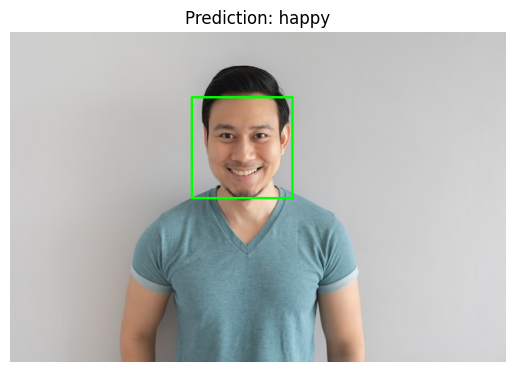

In [49]:
pred_and_plot("/kaggle/working/Final_Image_Happy.jpg", Emotion_Classes)

In [58]:
# Downloading Image to Test On
!wget -c "https://png.pngtree.com/png-clipart/20230914/original/pngtree-girl-happy-face-people-picture-image_13037972.png" -O Final_Image_Happy_2.jpg

--2023-12-03 09:01:25--  https://png.pngtree.com/png-clipart/20230914/original/pngtree-girl-happy-face-people-picture-image_13037972.png
Resolving png.pngtree.com (png.pngtree.com)... 104.18.2.157, 104.18.3.157, 2606:4700::6812:29d, ...
Connecting to png.pngtree.com (png.pngtree.com)|104.18.2.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 488147 (477K) [image/png]
Saving to: ‘Final_Image_Happy_2.jpg’

Final_Image_Happy_2 100%[===================>] 476.71K  --.-KB/s    in 0.03s   

2023-12-03 09:01:25 (15.5 MB/s) - ‘Final_Image_Happy_2.jpg’ saved [488147/488147]



1/1 [==============================] - 0s 145ms/step


,name,album,artist
0,Africa,Toto IV,TOTO
1,Here Comes The Sun - Remastered 2009,Abbey Road (Remastered),The Beatles
2,Take on Me,Hunting High and Low,a-ha
3,Happy Together,Happy Together,The Turtles
4,Crazy,St. Elsewhere,Gnarls Barkley


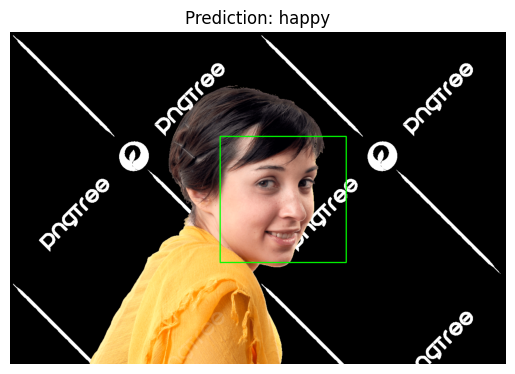

In [59]:
pred_and_plot("/kaggle/working/Final_Image_Happy_2.jpg", Emotion_Classes)